# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf
%matplotlib inline

In [45]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [46]:
df['flag_doente'] = (df['num'] != 0).astype('int64')

1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [47]:
tab_sex = pd.crosstab(df['sex'], df['flag_doente'], margins= True)
tab_sex

flag_doente,0,1,All
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


In [48]:
tab_sex['media_doentes']=tab_sex[1]/tab_sex['All']
tab_sex['Odds']=tab_sex[1]/tab_sex[0]
tab_sex['OR_All']=tab_sex['Odds']/tab_sex.loc['All','Odds']
tab_sex['Logito']=np.log(tab_sex['Odds'])
tab_sex['Log_OR_All']=np.log(tab_sex['OR_All'])
tab_sex

flag_doente,0,1,All,media_doentes,Odds,OR_All,Logito,Log_OR_All
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [49]:
df['age'].sort_values()
df['age'].quantile([0.20,0.40,0.60,0.80])
# 29 - 77

0.2    45.0
0.4    53.0
0.6    58.0
0.8    62.0
Name: age, dtype: float64

In [50]:
df.loc[df['age'] <= 45, 'cat_age'] = '29-45'
df.loc[(df['age'] > 45) & (df['age'] <=53), 'cat_age'] = '46-53'
df.loc[(df['age'] >=53) & (df['age'] <58), 'cat_age'] = '53-57'
df.loc[(df['age'] >=58) & (df['age'] <= 62), 'cat_age'] = '58-62'
df.loc[df['age'] >= 63, 'cat_age'] = '63-77'

In [64]:
tab_age = pd.crosstab(df['cat_age'], df['flag_doente'], margins= True)
tab_age['media_doentes']=tab_age[1]/tab_age['All']
tab_age['Odds']=tab_age[1]/tab_age[0]
tab_age['OR_All']=tab_age['Odds']/tab_age.loc['All','Odds']
tab_age['Logito']=np.log(tab_age['Odds'])
tab_age['Log_OR_All']=np.log(tab_age['OR_All'])
tab_age

flag_doente,0,1,All,media_doentes,Odds,OR_All,Logito,Log_OR_All
cat_age,,,,,,,,
29-45,47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166
46-53,36,20,56,0.357143,0.555556,0.655476,-0.587787,-0.422394
53-57,31,29,60,0.483333,0.935484,1.103736,-0.066691,0.098701
58-62,20,44,64,0.687500,2.200000,2.595683,0.788457,0.953850
63-77,30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

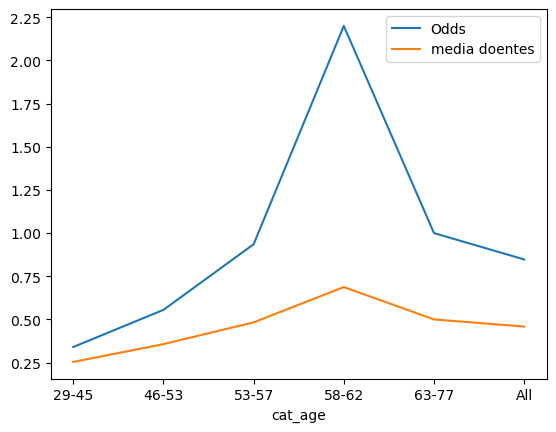

In [72]:
fig = plt.figure()
graf_age = fig.add_subplot(1, 1, 1)

graf_age = tab_age['Odds'].plot(label='Odds')
graf_age = tab_age['media_doentes'].plot(label='media doentes')
graf_age.legend(loc="upper right")